In [108]:
import pandas as pd

# Preparing data
We will rename columns to the same style of naming
We will also drop all columns where the track and artist are null, since it's likely that those were not really played songs

In [109]:
df = pd.read_csv('./music_project_en.csv')

df.rename(columns={'  City  ': 'city', '  userID': 'userId', 'Track': 'track', 'Day': 'day'}, inplace=True)
df = df.dropna(subset=['track', 'artist'], how='all')

print(df.head())
print(df.info())

     userId                        track            artist  genre  \
0  FFB692EC            Kamigata To Boots  The Mass Missile   rock   
1  55204538  Delayed Because of Accident  Andreas Rönnberg   rock   
2    20EC38            Funiculì funiculà       Mario Lanza    pop   
3  A3DD03C9        Dragons in the Sunset        Fire + Ice   folk   
4  E2DC1FAE                  Soul People        Space Echo  dance   

          city      time        day  
0  Shelbyville  20:28:33  Wednesday  
1  Springfield  14:07:09     Friday  
2  Shelbyville  20:58:07  Wednesday  
3  Shelbyville  08:37:09     Monday  
4  Springfield  08:34:34     Monday  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63736 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  63736 non-null  object
 1   track   63736 non-null  object
 2   artist  57512 non-null  object
 3   genre   63246 non-null  object
 4   city    63736 non-null  obje

# Testing hypothesis
## Hypothesis 1. User activity differs depending on the day of the week and from city to city.

In [110]:
for city in df['city'].unique():
    print(f'Total plays in {city}: ', df[df['city'] == city]['track'].count())

Total plays in Shelbyville:  19302
Total plays in Springfield:  44434


In [111]:
for day in df['day'].unique():
    print(f'Total plays on {day}: ', df[df['day'] == day]['track'].count())

Total plays on Wednesday:  18862
Total plays on Friday:  22768
Total plays on Monday:  22106


<AxesSubplot: xlabel='city,day'>

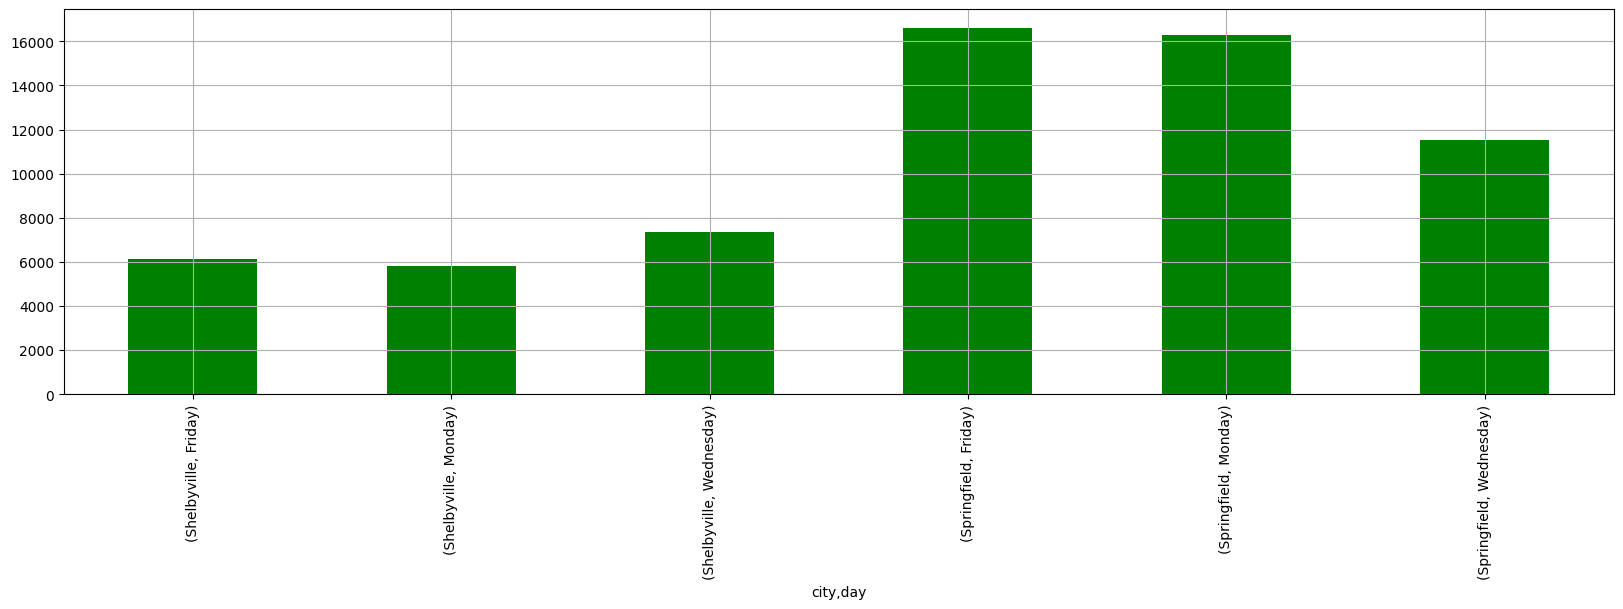

In [113]:

df.groupby(['city', 'day'])['track'].count().plot(kind='bar', figsize=(20, 5), color='green', grid=True)

### Conclusion for Hypothesis 1 - User activity differs depending on the day of the week and from city to city.

User activity really does diifer.

User activity differs much more by city than by day of the week. People in Springfield play 2 times more tracks than people in Shelbyville. People listen to more tracks on Friday and Monday then on Wednesday.